In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

# 데이터 로드 및 전처리
---
- CIFAR10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다. 데이터셋은 keras.datasets에서 불러올 수 있는 CIFAR10 데이터 셋을 활용합니다
- 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.

In [2]:
# 문제 3-1: cifar10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다.
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                  test_size=0.2,
                                                  random_state=123)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.
print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

from tensorflow.keras.utils import to_categorical

y_train_cat = to_categorical(y_train, num_classes=10)
y_val_cat = to_categorical(y_val, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


In [3]:
# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer',
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

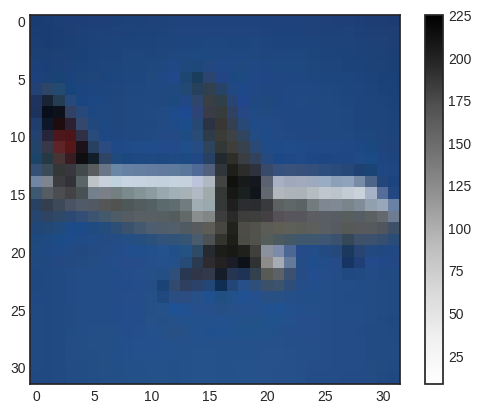

In [4]:
# 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화합니다.
plt.style.use('seaborn-v0_8-white')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [5]:
# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력합니다.
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [6]:
# 문제 3-2: 훈련, 검증, 테스트 데이터의 형태(shape)을 32 * 32 * 3 = 3072로 변형합니다.
x_train = x_train.reshape(-1, 32 * 32 * 3)
x_val = x_val.reshape(-1, 32 * 32 * 3)
x_test = x_test.reshape(-1, 32 * 32 * 3)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 3072)
(10000, 3072)
(10000, 3072)


In [7]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

In [8]:
# 문제 3-3: BatchNormalization과 Dropout을 적용하여 빠른 학습과 과대적합을 방지하고,
# 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.
model = models.Sequential()
model.add(layers.Input(shape=(3072, )))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,580,554 (6.03 MB)

 Trainable params: 1,579,530 (6.03 MB)

 Non-trainable params: 1,024 (4.00 KB)

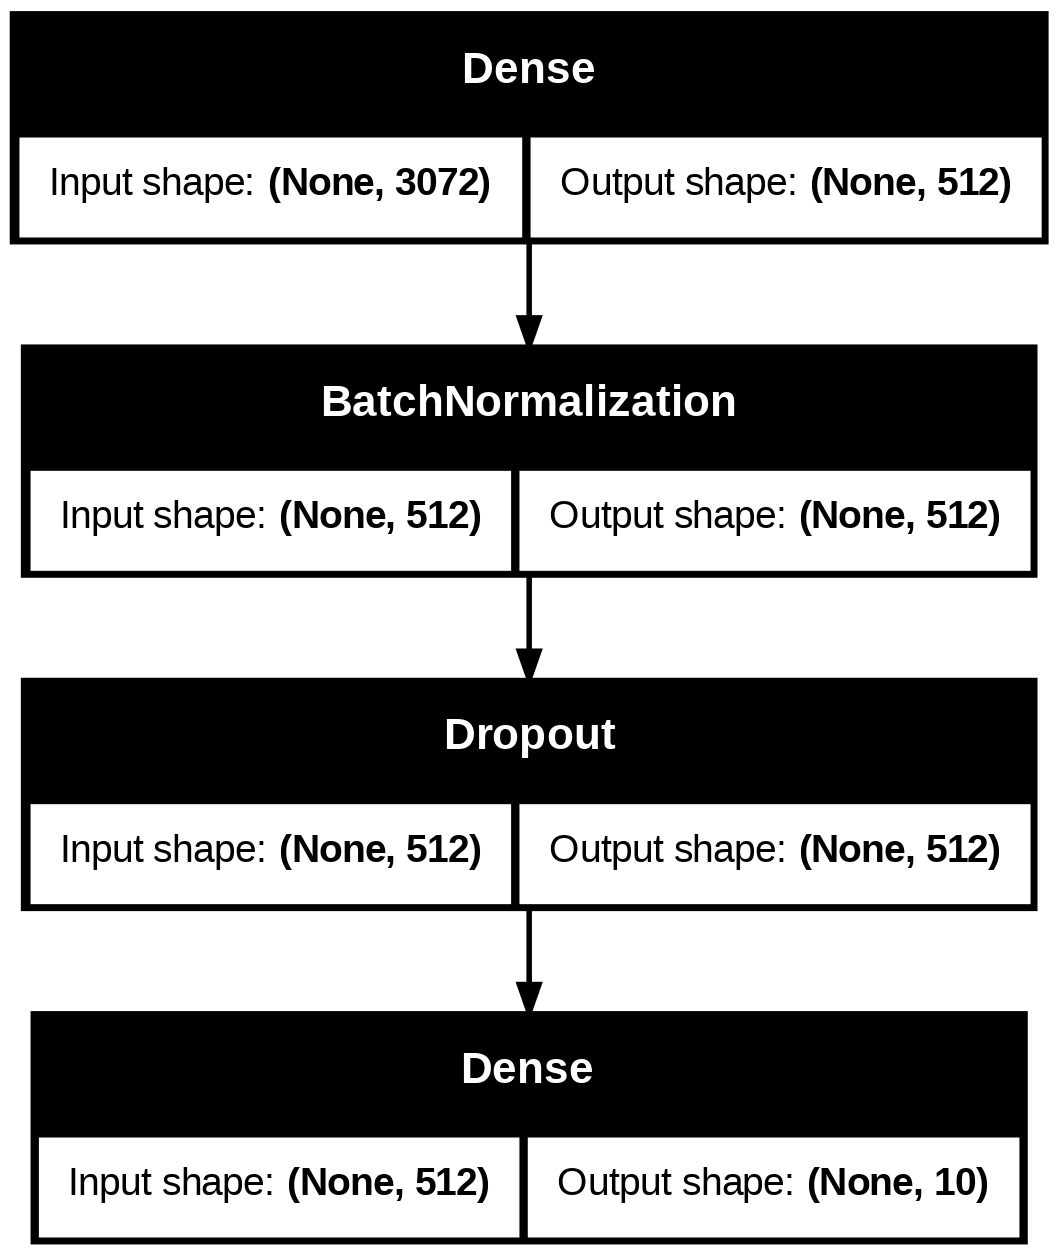

In [9]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

# 모델 학습
---
- ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.

In [10]:
# 문제 3-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
from tensorflow.keras import callbacks

check_point_cb = callbacks.ModelCheckpoint(' cifar10_model.h5',
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10,
                                            monitor='val_loss',
                                            restore_best_weights=True)
history = model.fit(
    x_train, y_train_cat,
    epochs=200,
    validation_data=(x_val, y_val_cat),
    callbacks=[check_point_cb, early_stopping_cb]
)

Epoch 1/200
1242/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2806 - loss: 2.1561

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.2808 - loss: 2.1550 - val_accuracy: 0.3429 - val_loss: 1.8399
Epoch 2/200
1234/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3548 - loss: 1.8262

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3547 - loss: 1.8263 - val_accuracy: 0.3479 - val_loss: 1.8219
Epoch 3/200
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3439 - loss: 1.8441 - val_accuracy: 0.3549 - val_loss: 1.8517
Epoch 4/200
1246/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3402 - loss: 1.8442

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3402 - loss: 1.8442 - val_accuracy: 0.3720 - val_loss: 1.8063
Epoch 5/200
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3370 - loss: 1.8412 - val_accuracy: 0.3469 - val_loss: 1.8094
Epoch 6/200
1242/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3488 - loss: 1.8263

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.3488 - loss: 1.8263 - val_accuracy: 0.3602 - val_loss: 1.7901
Epoch 7/200
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3488 - loss: 1.8272

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3488 - loss: 1.8272 - val_accuracy: 0.3771 - val_loss: 1.7693
Epoch 8/200
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3399 - loss: 1.8397 - val_accuracy: 0.3825 - val_loss: 1.7717
Epoch 9/200
1247/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3380 - loss: 1.8481

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.3380 - loss: 1.8481 - val_accuracy: 0.3835 - val_loss: 1.7490
Epoch 10/200
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3292 - loss: 1.8540 - val_accuracy: 0.3833 - val_loss: 1.7922
Epoch 11/200
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3278 - loss: 1.8601 - val_accuracy: 0.3874 - val_loss: 1.7654
Epoch 12/200
1240/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3346 - loss: 1.8438

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3347 - loss: 1.8437 - val_accuracy: 0.3896 - val_loss: 1.7442
Epoch 13/200
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3431 - loss: 1.8262 - val_accuracy: 0.3903 - val_loss: 1.7632
Epoch 14/200
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.3397 - loss: 1.8293 - val_accuracy: 0.3890 - val_loss: 1.7547
Epoch 15/200
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3455 - loss: 1.8283 - val_accuracy: 0.3873 - val_loss: 1.7593
Epoch 16/200
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3389 - loss: 1.8252 - val_accuracy: 0.3898 - val_loss: 1.7481
Epoch 17/200
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3476 - loss: 1.8176 - val_accuracy: 0.3823 - val_loss: 1.7502
Epoch 18/200
1231/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3414 - loss: 1.8221

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3414 - loss: 1.8221 - val_accuracy: 0.4029 - val_loss: 1.7279
Epoch 19/200
1229/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3452 - loss: 1.8192

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3452 - loss: 1.8192 - val_accuracy: 0.4018 - val_loss: 1.7224
Epoch 20/200
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3446 - loss: 1.8263 - val_accuracy: 0.3699 - val_loss: 1.7680
Epoch 21/200
1246/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3508 - loss: 1.8204

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3507 - loss: 1.8204 - val_accuracy: 0.3992 - val_loss: 1.7222
Epoch 22/200
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3496 - loss: 1.8243 - val_accuracy: 0.4038 - val_loss: 1.7352
Epoch 23/200
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3453 - loss: 1.8215

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3453 - loss: 1.8215 - val_accuracy: 0.4009 - val_loss: 1.7106
Epoch 24/200
1243/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3581 - loss: 1.8031

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3581 - loss: 1.8031 - val_accuracy: 0.3977 - val_loss: 1.7075
Epoch 25/200
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3545 - loss: 1.8127 - val_accuracy: 0.3975 - val_loss: 1.7311
Epoch 26/200
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.3481 - loss: 1.8239 - val_accuracy: 0.3931 - val_loss: 1.7235
Epoch 27/200
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3509 - loss: 1.8216 - val_accuracy: 0.3988 - val_loss: 1.7101
Epoch 28/200
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3517 - loss: 1.8156 - val_accuracy: 0.4032 - val_loss: 1.7263
Epoch 29/200
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3485 - loss: 1.8229 - val_accuracy: 0.3982 - val_loss: 1.7336
Epoch 30/200
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3484 - loss: 1.8339 - val_accuracy: 0.3941 - val_loss: 1.7200
Epoch 31/200
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.3573 - loss: 1.8013

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3630 - loss: 1.7840 - val_accuracy: 0.4134 - val_loss: 1.6878
Epoch 34/200
1247/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3715 - loss: 1.7737

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.3715 - loss: 1.7737 - val_accuracy: 0.4083 - val_loss: 1.6845
Epoch 35/200
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3695 - loss: 1.7755 - val_accuracy: 0.4125 - val_loss: 1.6859
Epoch 36/200
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.3643 - loss: 1.7781 - val_accuracy: 0.3739 - val_loss: 1.7897
Epoch 37/200
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.3516 - loss: 1.8073 - val_accuracy: 0.3996 - val_loss: 1.7285
Epoch 38/200
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.3531 - loss: 1.8036 - val_accuracy: 0.4168 - val_loss: 1.6960
Epoch 39/200
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3564 - loss: 1.8020 - val_accuracy: 0.4051 - val_loss: 1.7063
Epoch 40/200
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3514 - loss: 1.8108 - val_accuracy: 0.4176 - val_loss: 1.7017
Epoch 41/200
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3574 - loss: 1.8053

In [10]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-v0_8-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

# 모델 평가 및 예측
---
- 테스트 데이터셋을 이용해 모델을 평가합니다.

In [11]:
# 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(x_test, y_test_cat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4090 - loss: 1.6608


[1.6680446863174438, 0.40880000591278076]

In [12]:
test_loss, test_accuracy = model.evaluate(x_test, y_test_cat)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4090 - loss: 1.6608
Test Loss: 1.6680
Test Accuracy: 0.4088
